In [14]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from datetime import datetime
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import grangercausalitytests
from sklearn.preprocessing import MinMaxScaler

In [15]:
#Import Data

insta = pd.read_csv('instagram_final.csv')
sales = pd.read_csv('sales_final.csv')

#Join Datasets

data = pd.concat([insta, sales], join="outer")
data = data.groupby('Date').sum()
data = data.drop(columns=['Unnamed: 0'])

#Selecting relevant obeservations (creating dataset)

data_1 = data.iloc[345:1046,]

In [16]:
data_1['sales'] = data_1.iloc[:,-1]

<ipython-input-16-23cd4281da7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['sales'] = data_1.iloc[:,-1]


In [4]:
data_1

,promotion_post,like,comment,share,save,product_page_views,product_button_click,profile_visits,web_clicks,busi_add_taps,...,is_websites_taps,is_sticker_taps,is_get_direction_button_taps,is_business_address_taps,is_reach,is_impression,is_follows,Quantity,Total,sales
Date,,,,,,,,,,,,,,,,,,,,,
2019-07-01,0.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,3490.0,3490.0
2019-07-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,5829.6,5829.6
2019-07-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,4991.6,4991.6
2019-07-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1573.0,1573.0
2019-07-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,5635.2,5635.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-27,0.0,21.0,2.0,1.0,6.0,70.0,3.0,25.0,2.0,0.0,...,1.0,0.0,0.0,0.0,1218.0,1247.0,0.0,80.0,12231.6,12231.6
2021-05-28,0.0,7.0,0.0,0.0,2.0,11.0,0.0,4.0,0.0,0.0,...,3.0,14.0,0.0,0.0,2673.0,2735.0,0.0,43.0,6622.3,6622.3
2021-05-29,0.0,8.0,0.0,0.0,1.0,9.0,0.0,0.0,0.0,0.0,...,1.0,108.0,0.0,0.0,3161.0,3330.0,0.0,16.0,5106.5,5106.5


In [17]:
data_1 = data_1[['promotion_post', 'like', 'comment', 'share', 'save','product_page_views', 
                'product_button_click', 'profile_visits', 'web_clicks', 'busi_add_taps', 
                'follows', 'reach', 'total_imp','imp_home', 'imp_profile', 'imp_hashtag', 
                'imp_other', 'imp_explore','is_shares', 'is_replies', 'is_profile_visits', 
                'is_websites_taps','is_sticker_taps', 'is_get_direction_button_taps',
                'is_business_address_taps', 'is_reach', 'is_impression', 'is_follows','Quantity', 'sales']]

In [18]:
data_1.iloc[:,28:30].describe()

,Quantity,sales
count,701.000000,701.000000
mean,14.171184,3642.213609
std,96.140340,4246.508514
min,0.000000,0.000000
25%,2.000000,918.100000
50%,5.000000,2466.000000
75%,10.000000,4943.100000
max,2020.000000,52324.200000


<AxesSubplot:>

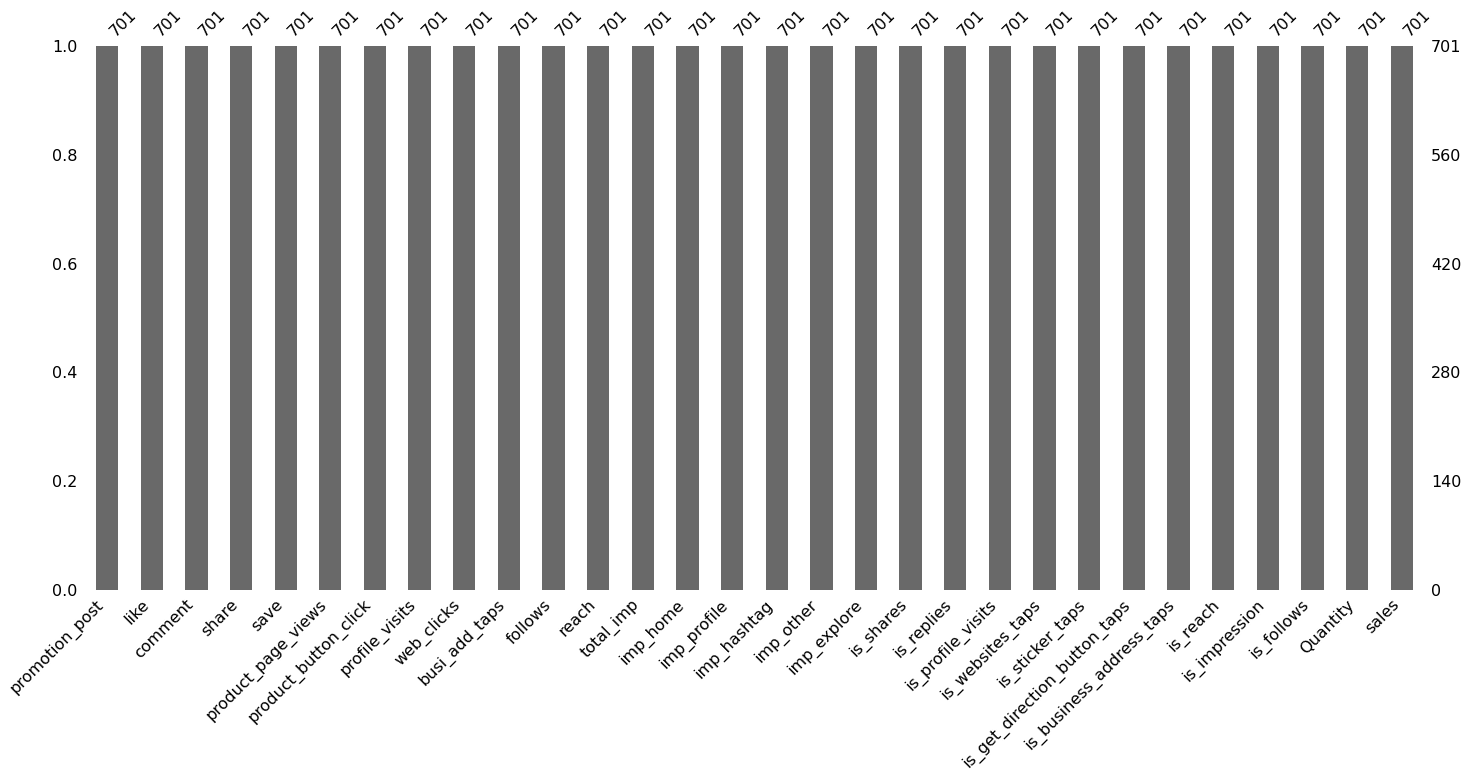

In [7]:
import missingno

missingno.bar(data_1)

In [ ]:
#Correlation

In [19]:
#calculate correlation table
correlation = data_1.corr()
correlation

,promotion_post,like,comment,share,save,product_page_views,product_button_click,profile_visits,web_clicks,busi_add_taps,...,is_profile_visits,is_websites_taps,is_sticker_taps,is_get_direction_button_taps,is_business_address_taps,is_reach,is_impression,is_follows,Quantity,sales
promotion_post,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
like,NaN,1.000000,0.178693,0.240686,0.283991,0.093737,0.084531,0.424579,0.370126,0.467455,...,-0.000586,0.049002,0.009904,0.004267,0.153281,0.044576,0.039385,0.025256,-0.014186,0.032974
comment,NaN,0.178693,1.000000,0.725427,0.191470,0.534744,0.176840,0.112995,0.140248,0.016898,...,-0.005759,-0.008117,-0.002155,-0.004677,-0.000194,0.003067,0.001066,0.001752,-0.008555,0.013944
share,NaN,0.240686,0.725427,1.000000,0.664047,0.516442,0.365131,0.380458,0.503825,0.043319,...,0.010428,0.015794,0.028940,0.010350,0.048050,0.023613,0.018262,0.035370,-0.006780,0.001451
save,NaN,0.283991,0.191470,0.664047,1.000000,0.236201,0.287963,0.675210,0.891338,0.137124,...,0.004085,0.062440,0.025090,0.010254,0.102875,0.058246,0.051195,0.031508,-0.006212,-0.020041
product_page_views,NaN,0.093737,0.534744,0.516442,0.236201,1.000000,0.832670,0.038301,0.006210,-0.071416,...,-0.003032,0.033825,0.049847,-0.020591,-0.059566,0.022620,0.022261,0.010811,-0.015325,-0.032164
product_button_click,NaN,0.084531,0.176840,0.365131,0.287963,0.832670,1.000000,0.054248,0.028884,-0.049426,...,0.001000,0.037126,0.079231,-0.019151,-0.051661,0.026398,0.023422,0.014796,-0.005764,-0.003619
profile_visits,NaN,0.424579,0.112995,0.380458,0.675210,0.038301,0.054248,1.000000,0.675221,0.383763,...,0.023507,0.144678,-0.005618,0.054132,0.254729,0.121993,0.117605,0.055541,-0.008239,-0.001962
web_clicks,NaN,0.370126,0.140248,0.503825,0.891338,0.006210,0.028884,0.675221,1.000000,0.231883,...,0.007617,0.062070,-0.000700,0.020392,0.122809,0.055702,0.051116,0.022773,-0.006197,-0.009874
busi_add_taps,NaN,0.467455,0.016898,0.043319,0.137124,-0.071416,-0.049426,0.383763,0.231883,1.000000,...,0.029063,0.198540,0.020314,0.078951,0.405795,0.169202,0.163645,0.064269,0.026661,0.079341


<AxesSubplot:>

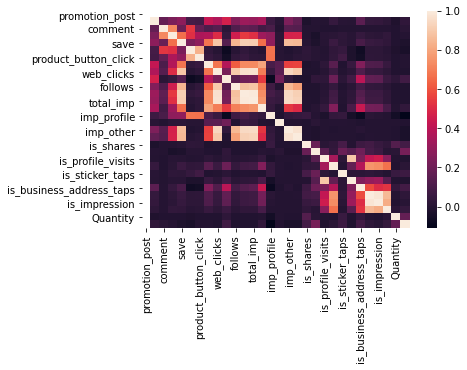

In [19]:
sns.heatmap(correlation)

In [21]:
correlation_sig = correlation[(correlation > 0.5)]
correlation_sig

,promotion_post,like,comment,share,save,product_page_views,product_button_click,profile_visits,web_clicks,busi_add_taps,...,is_profile_visits,is_websites_taps,is_sticker_taps,is_get_direction_button_taps,is_business_address_taps,is_reach,is_impression,is_follows,Quantity,sales
promotion_post,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
like,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comment,NaN,NaN,1.000000,0.725427,NaN,0.534744,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
share,NaN,NaN,0.725427,1.000000,0.664047,0.516442,NaN,NaN,0.503825,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
save,NaN,NaN,NaN,0.664047,1.000000,NaN,NaN,0.675210,0.891338,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_page_views,NaN,NaN,0.534744,0.516442,NaN,1.000000,0.832670,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_button_click,NaN,NaN,NaN,NaN,NaN,0.832670,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
profile_visits,NaN,NaN,NaN,NaN,0.675210,NaN,NaN,1.000000,0.675221,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
web_clicks,NaN,NaN,NaN,0.503825,0.891338,NaN,NaN,0.675221,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
busi_add_taps,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#DATA PRE-PROCESSING

In [22]:
#Determine the 75th percentile
data_1_des = data_1.iloc[:,10:20].describe()
data_1_des

,follows,reach,total_imp,imp_home,imp_profile,imp_hashtag,imp_other,imp_explore,is_shares,is_replies
count,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000
mean,0.870185,2963.517832,4433.716120,2218.171184,288.423680,76.145506,1254.495007,390.500713,0.566334,0.469330
std,8.494972,18359.749720,36109.053151,12972.591245,377.791139,1098.114638,18958.483363,8596.836189,2.931642,1.324813
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,903.000000,1000.000000,610.000000,28.000000,6.000000,4.000000,0.000000,0.000000,0.000000
50%,0.000000,1268.000000,1392.000000,930.000000,194.000000,15.000000,11.000000,0.000000,0.000000,0.000000
75%,0.000000,1623.000000,1777.000000,1256.000000,406.000000,34.000000,216.000000,3.000000,0.000000,0.000000
max,172.000000,443558.000000,880011.000000,254553.000000,4083.000000,29074.000000,485049.000000,227200.000000,61.000000,21.000000


In [8]:
data_4 = data_1

In [20]:
data_4['like'] = np.where((data_4['like'] > 25), int(25), data_4['like'])
data_4['comment'] = np.where((data_4['comment'] > 0), int(0), data_4['comment'])
data_4['share'] = np.where((data_4['share'] > 1), int(1), data_4['share'])
data_4['save'] = np.where((data_4['save'] > 4), int(4), data_4['save'])
data_4['product_page_views'] = np.where((data_4['product_page_views'] > 7), int(7), data_4['product_page_views'])
data_4['product_button_click'] = np.where((data_4['product_button_click'] > 0), int(0), data_4['product_button_click'])
data_4['profile_visits'] = np.where((data_4['profile_visits'] > 20), int(20), data_4['profile_visits'])
data_4['web_clicks'] = np.where((data_4['web_clicks'] > 6), int(6), data_4['web_clicks'])
data_4['busi_add_taps'] = np.where((data_4['busi_add_taps'] > 0), int(0), data_4['busi_add_taps'])
data_4['follows'] = np.where((data_4['follows'] > 0), int(0), data_4['follows'])
data_4['reach'] = np.where((data_4['reach'] > 1623), int(1623), data_4['reach'])
data_4['total_imp'] = np.where((data_4['total_imp'] > 1777), int(1777), data_4['total_imp'])
data_4['imp_home'] = np.where((data_4['imp_home'] > 1256), int(1256), data_4['imp_home'])
data_4['imp_profile'] = np.where((data_4['imp_profile'] > 406), int(406), data_4['imp_profile'])
data_4['imp_hashtag'] = np.where((data_4['imp_hashtag'] > 34), int(34), data_4['imp_hashtag'])
data_4['imp_other'] = np.where((data_4['imp_other'] > 216), int(216), data_4['imp_other'])
data_4['imp_explore'] = np.where((data_4['imp_explore'] > 3), int(3), data_4['imp_explore'])
data_4['is_shares'] = np.where((data_4['is_shares'] > 0), int(0), data_4['is_shares'])
data_4['is_replies'] = np.where((data_4['is_replies'] > 0), int(0), data_4['is_replies'])
data_4['is_profile_visits'] = np.where((data_4['is_profile_visits'] > 8), int(8), data_4['is_profile_visits'])
data_4['is_websites_taps'] = np.where((data_4['is_websites_taps'] > 4), int(4), data_4['is_websites_taps'])
data_4['is_sticker_taps'] = np.where((data_4['is_sticker_taps'] > 0), int(0), data_4['is_sticker_taps'])
data_4['is_get_direction_button_taps'] = np.where((data_4['is_get_direction_button_taps'] > 0), int(0), data_4['is_get_direction_button_taps'])
data_4['is_business_address_taps'] = np.where((data_4['is_business_address_taps'] > 0), int(0), data_4['is_business_address_taps'])
data_4['is_reach'] = np.where((data_4['is_reach'] > 1952), int(1952), data_4['is_reach'])
data_4['is_impression'] = np.where((data_4['is_impression'] > 2020), int(2020), data_4['is_impression'])
data_4['is_follows'] = np.where((data_4['is_follows'] > 0), int(0), data_4['is_follows'])
data_4['Quantity'] = np.where((data_4['Quantity'] > 10), int(10), data_4['Quantity'])
data_4['sales'] = np.where((data_4['sales'] > 4943), int(4943), data_4['sales'])

<ipython-input-20-6d7e286d16e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_4['like'] = np.where((data_4['like'] > 25), int(25), data_4['like'])
<ipython-input-20-6d7e286d16e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_4['comment'] = np.where((data_4['comment'] > 0), int(0), data_4['comment'])
<ipython-input-20-6d7e286d16e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [21]:
data_4.to_csv("capstone_4.csv")

In [ ]:
#Granger Causality of different time series

In [40]:
maxlag = 7
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [ ]:
gc_results_4 = grangers_causation_matrix(data_4, variables = data_4.columns[[1,3,4,5,7,8,11,
                                                                            12,13,14,15,16,17,20,
                                                                            21,25,26,29]])
gc_results_4.iloc[-1,:] 

#Sig: share, save, product_page_views, profile_visits, reach, total_imp, imp_home, imp_profile, imp_hashtag, imp_other, imp_explore, is_profile_visits, is_websites_taps, is_reach, is_impression